In [626]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc = {'figure.figsize':(20,8)})

# Train and test data stored separately as per the given conditions.

In [627]:
data1 = pd.read_csv('TRAIN.csv')
data2 = pd.read_csv('TEST1.csv')


In [628]:
data1.describe()

,ID,variable
count,8640.000000,8640.000000
mean,4320.500000,0.561921
std,2494.297496,4.229673
min,1.000000,0.000000
25%,2160.750000,0.000000
50%,4320.500000,0.000000
75%,6480.250000,0.000000
max,8640.000000,335.000000


In [629]:
data2.describe()

,ID,variable
count,1440.000000,1440.000000
mean,9360.500000,3.773611
std,415.836506,13.957699
min,8641.000000,0.000000
25%,9000.750000,0.000000
50%,9360.500000,0.000000
75%,9720.250000,2.000000
max,10080.000000,208.000000


# Part1:Using the boxplot method to find out the global outlier on the dataset

In [630]:
a = data1.variable.unique()
a

array([  0,   2,   4,   3,   1,   6,   5,   9,  10,   7,  26,  21,  28,
         8,  12,  11,  14,  24,  13,  16,  15,  70,  34,  19,  41,  22,
        52, 335,  98,  49,  32], dtype=int64)

{'whiskers': [<matplotlib.lines.Line2D at 0x170c77e1940>,
 'caps': [<matplotlib.lines.Line2D at 0x170c77eb040>,
 'boxes': [<matplotlib.lines.Line2D at 0x170c77e15b0>],
 'medians': [<matplotlib.lines.Line2D at 0x170c77eb700>],
 'fliers': [<matplotlib.lines.Line2D at 0x170c77eba60>],
 'means': []}

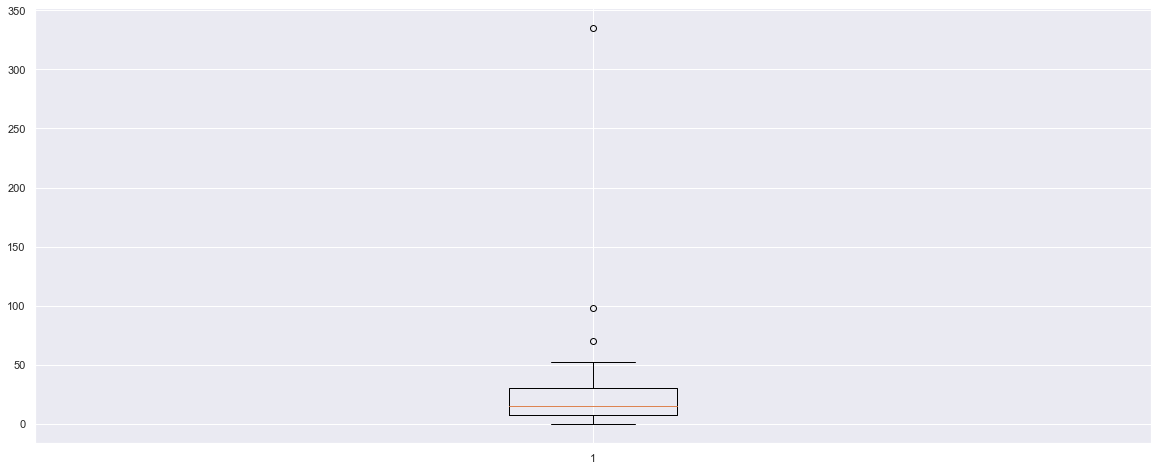

In [631]:
plt.boxplot(a)

# Detected 52,98,335 as an outlier in the training data

In [632]:
b = data2.variable.unique()
b

array([  2,   0,   4,   6,   3,  11,   5,   1,  13,   9,  64,   7,  12,
         8,  23,  17,  19,  22,  86,  38,  25,  27,  94,  47,  37,  14,
       199,  26, 105,  45,  20,  50,  35,  53,  16,  15,  44, 124,  51,
        72, 109,  30,  58,  70,  80,  61,  93, 133,  24,  40,  21,  39,
        74,  46,  10,  28, 117,  87,  36,  34, 208], dtype=int64)

{'whiskers': [<matplotlib.lines.Line2D at 0x170c8e00b80>,
 'caps': [<matplotlib.lines.Line2D at 0x170c8e0d280>,
 'boxes': [<matplotlib.lines.Line2D at 0x170c8e00820>],
 'medians': [<matplotlib.lines.Line2D at 0x170c8e0d940>],
 'fliers': [<matplotlib.lines.Line2D at 0x170c8e0dca0>],
 'means': []}

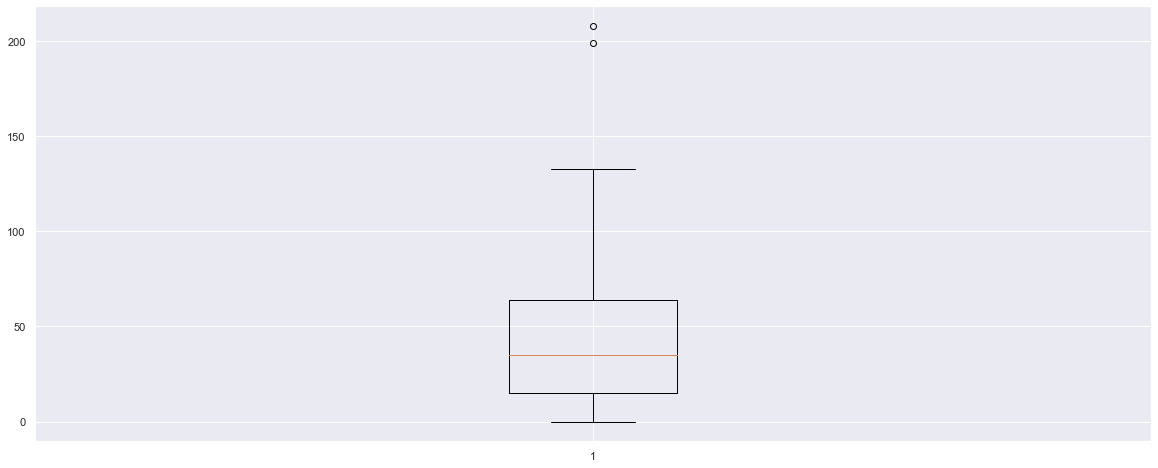

In [633]:
plt.boxplot(b)

# Detected 199 and 208 as an outlier in the training data.

# Revisting the graph again for a granular observation.

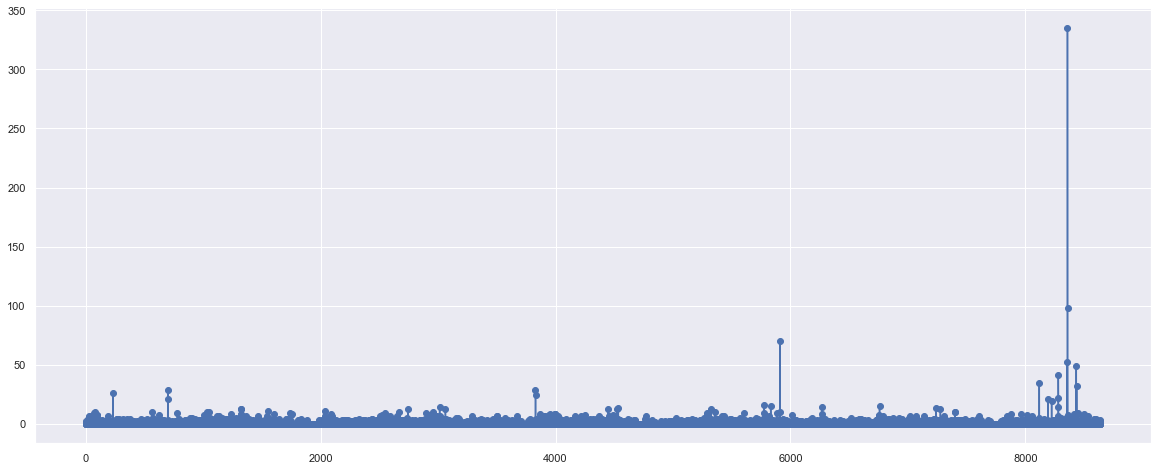

In [634]:
 plt.plot(data1['variable'].values,marker ='o')
 

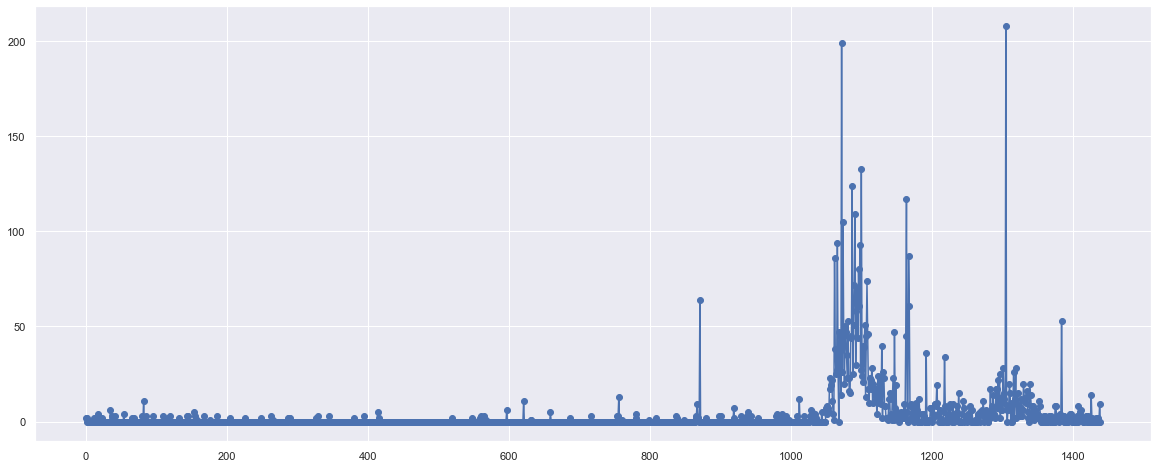

In [635]:
plt.plot(data2['variable'].values,marker ='o')

# Test2 : It seems from the data set view that the standard method missed out some of the outlier.So we can employ a second method.Out of 8640 data , variable 0 occupies 84% of the values.We exclude 0 from out observation for better understanding.Also, we make an assumption of the threshold count to 10(double digit) for outlier and inlier considerations and revisit our train plot .

<AxesSubplot:xlabel='variable', ylabel='count'>

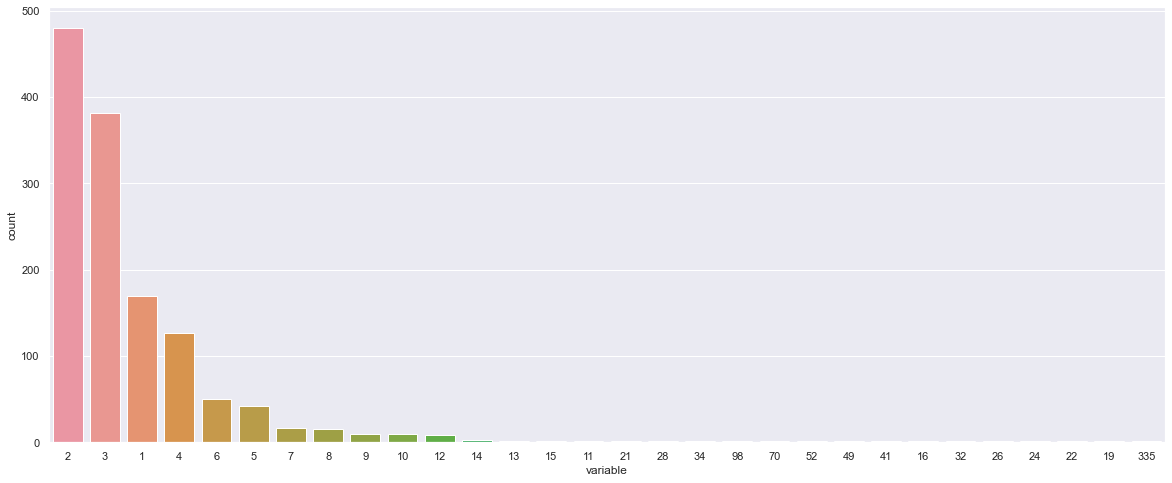

In [636]:
data11 = data1[data1.variable != 0]
sns.countplot(x ='variable', data = data11,order = data11['variable'].value_counts().index)
 

In [637]:
data11['variable'].value_counts()

2      480
3      382
1      170
4      127
6       50
5       42
7       17
8       15
9       10
10      10
12       8
14       3
13       2
15       2
11       2
21       2
28       2
34       1
98       1
70       1
52       1
49       1
41       1
16       1
32       1
26       1
24       1
22       1
19       1
335      1
Name: variable, dtype: int64

In [638]:
df =data1['variable'].value_counts()

In [639]:
df[df.values>=10]

0     7303
2      480
3      382
1      170
4      127
6       50
5       42
7       17
8       15
9       10
10      10
Name: variable, dtype: int64

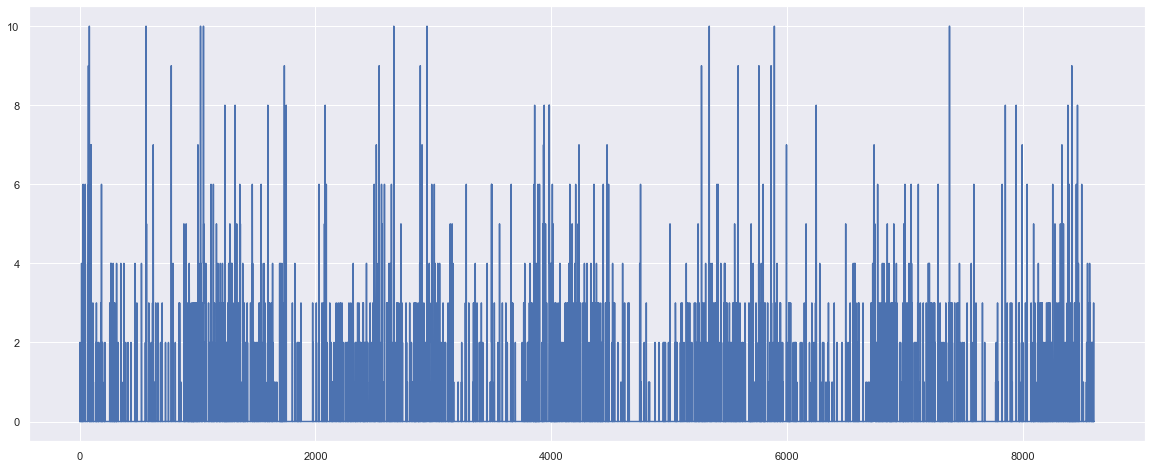

In [640]:
plt.plot(data1[data1.variable <=10].variable.values)

# We do the same for the test data.

<AxesSubplot:xlabel='variable', ylabel='count'>

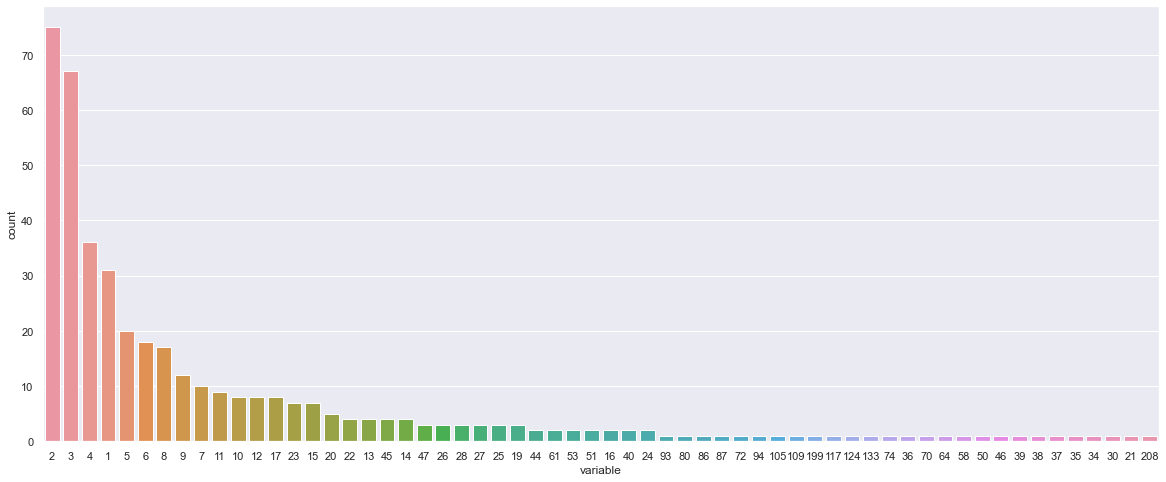

In [641]:
data12 = data2[data2.variable != 0]
sns.countplot(x ='variable', data = data12,order = data12['variable'].value_counts().index)

In [642]:
data12['variable'].value_counts()

2      75
3      67
4      36
1      31
5      20
6      18
8      17
9      12
7      10
11      9
10      8
12      8
17      8
23      7
15      7
20      5
22      4
13      4
45      4
14      4
47      3
26      3
28      3
27      3
25      3
19      3
44      2
61      2
53      2
51      2
16      2
40      2
24      2
93      1
80      1
86      1
87      1
72      1
94      1
105     1
109     1
199     1
117     1
124     1
133     1
74      1
36      1
70      1
64      1
58      1
50      1
46      1
39      1
38      1
37      1
35      1
34      1
30      1
21      1
208     1
Name: variable, dtype: int64

In [643]:
df1 =data2['variable'].value_counts()
df1[df1.values>=10]

0    1027
2      75
3      67
4      36
1      31
5      20
6      18
8      17
9      12
7      10
Name: variable, dtype: int64

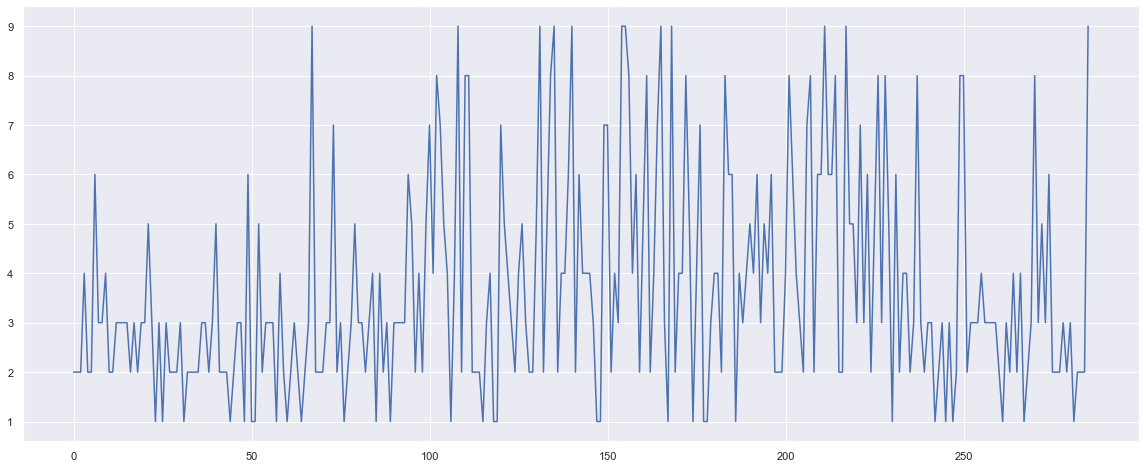

In [644]:
plt.plot(data12[data12.variable <=9].variable.values)

# Test 3:Also,we can now make an assumption of this data as some kind of a signal data which hovers about the mean. Mean can be taken as a central point of reference ,hence values +/- mean  value i.e. a range can be taken as a cutoff for outlier detection.

In [645]:
data11.variable.mean()

3.631264023934181

In [646]:
data12.variable.mean()

13.157384987893462

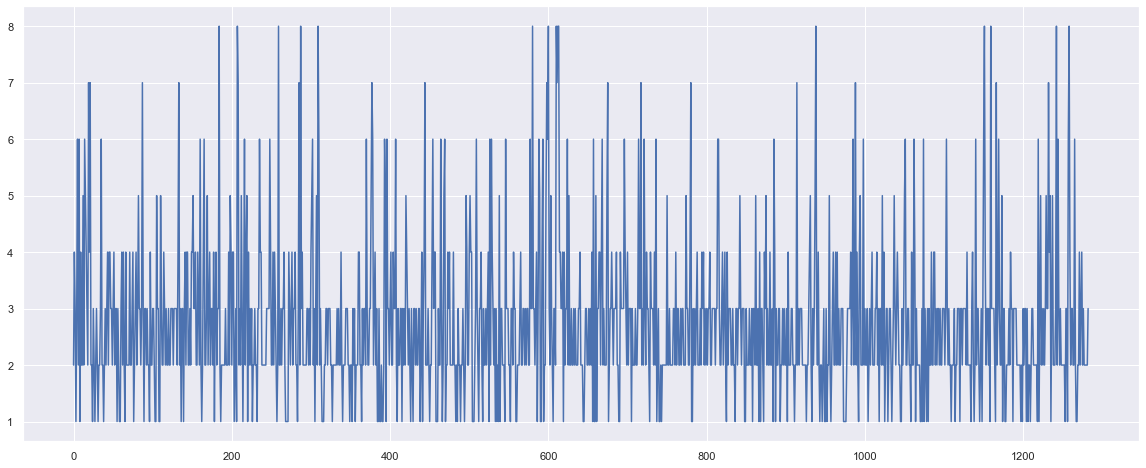

In [647]:
plt.plot(data11[data11.variable <=8].variable.values)

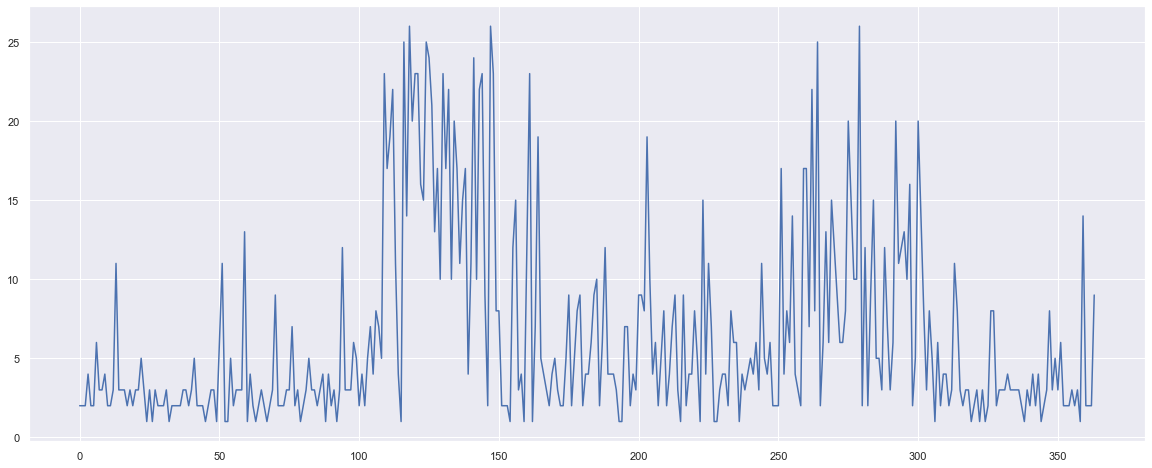

In [648]:
plt.plot(data12[data12.variable <=26].variable.values)